# Training

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

import sys
sys.path.append('..')

import src.utils as utils

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
FILE_PATH = '../data/processed/eo_football_processed.csv'
football = pd.read_csv(FILE_PATH)
football.head()

,Date,SeasonLabel,HomeTeam,AwayTeam,FTR,HCLPOS,ACLPOS,HGD,AGD,HPOINTS,...,HAVGST,AAVGST,HAVGGC,AAVGGC,HAVGC,AAVGC,HAVGCC,AAVGCC,HAVGCL,AAVGCL
0,2016-08-13,2016_2017,Burnley,Swansea,A,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-08-13,2016_2017,Crystal Palace,West Brom,A,3,17,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-08-13,2016_2017,Everton,Tottenham,D,5,16,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-08-13,2016_2017,Hull,Leicester,H,7,15,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-08-13,2016_2017,Man City,Sunderland,H,9,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
football['Date'] = pd.to_datetime(football['Date'])
football.head()

,Date,SeasonLabel,HomeTeam,AwayTeam,FTR,HCLPOS,ACLPOS,HGD,AGD,HPOINTS,...,HAVGST,AAVGST,HAVGGC,AAVGGC,HAVGC,AAVGC,HAVGCC,AAVGCC,HAVGCL,AAVGCL
0,2016-08-13,2016_2017,Burnley,Swansea,A,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-08-13,2016_2017,Crystal Palace,West Brom,A,3,17,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-08-13,2016_2017,Everton,Tottenham,D,5,16,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-08-13,2016_2017,Hull,Leicester,H,7,15,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-08-13,2016_2017,Man City,Sunderland,H,9,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# grab six weeks of every season
data = utils.rows_extractor(football, shift=8)
data.to_csv('data.csv', index=False)
data.head()

,Date,SeasonLabel,HomeTeam,AwayTeam,FTR,HCLPOS,ACLPOS,HGD,AGD,HPOINTS,...,HAVGST,AAVGST,HAVGGC,AAVGGC,HAVGC,AAVGC,HAVGCC,AAVGCC,HAVGCL,AAVGCL
0,2016-10-15,2016_2017,Arsenal,Swansea,H,4,18,9,-6,16,...,5.000000,4.000000,1.000000,1.714286,5.571429,3.571429,2.142857,7.000000,0.428571,0.142857
1,2016-10-15,2016_2017,Bournemouth,Hull,H,11,14,-5,-7,8,...,3.000000,2.857143,1.571429,2.000000,5.571429,3.857143,4.285714,6.571429,0.285714,0.142857
2,2016-10-15,2016_2017,Chelsea,Leicester,H,6,12,3,-3,13,...,6.000000,3.571429,1.285714,1.571429,6.571429,4.571429,3.571429,4.857143,0.285714,0.428571
3,2016-10-15,2016_2017,Crystal Palace,West Ham,A,9,17,3,-9,11,...,4.142857,2.714286,1.142857,2.428571,6.714286,3.714286,6.285714,4.428571,0.000000,0.142857
4,2016-10-15,2016_2017,Man City,Everton,D,2,6,11,6,18,...,6.142857,6.000000,1.000000,0.714286,5.714286,5.857143,4.571429,5.285714,0.142857,0.285714


In [183]:
label_encoder = LabelEncoder()
data['FTR'] = label_encoder.fit_transform(data.FTR)

In [184]:
X = data.iloc[:,5:]
y = data['FTR']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [137]:
model = RandomForestClassifier(n_estimators=300, max_depth=32, min_samples_split=100)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=100, n_estimators=300)

In [138]:
model.score(X_train, y_train)

0.6112903225806452

In [139]:
model.score(X_test, y_test)

0.5419354838709678

## Optimization

In [145]:
import optuna

C:\Users\Samie\Desktop\work\ai-work\data-science-repo\football-predictions\footy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [148]:
def objective(trial):    
    
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    min_samples_split = int(trial.suggest_float('min_samples_split', 200, 1000, log=True))

    clf = RandomForestClassifier(    
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    
    return cross_val_score(
        clf, X_train, y_train, n_jobs=-1, cv=10).mean()  # Train and evaluate the model.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-04-08 15:24:58,785] A new study created in memory with name: no-name-01a36d80-1bd0-4958-9ff7-6371626f6a9f
[I 2022-04-08 15:25:53,854] Trial 0 finished with value: 0.5435483870967742 and parameters: {'n_estimators': 578, 'max_depth': 9.641808289063283, 'min_samples_split': 397.09966031902303}. Best is trial 0 with value: 0.5435483870967742.
[I 2022-04-08 15:26:03,181] Trial 1 finished with value: 0.5443548387096774 and parameters: {'n_estimators': 904, 'max_depth': 31.229081540388282, 'min_samples_split': 356.95658732141203}. Best is trial 1 with value: 0.5443548387096774.
[I 2022-04-08 15:26:04,422] Trial 2 finished with value: 0.5387096774193548 and parameters: {'n_estimators': 122, 'max_depth': 1.321690488011752, 'min_samples_split': 276.4024012288817}. Best is trial 1 with value: 0.5443548387096774.
[I 2022-04-08 15:26:12,775] Trial 3 finished with value: 0.542741935483871 and parameters: {'n_estimators': 699, 'max_depth': 2.398717242994062, 'min_samples_split': 261.94933253

[I 2022-04-08 15:28:54,297] Trial 33 finished with value: 0.5508064516129032 and parameters: {'n_estimators': 826, 'max_depth': 23.236479622393514, 'min_samples_split': 216.7990195264775}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:28:58,991] Trial 34 finished with value: 0.5459677419354838 and parameters: {'n_estimators': 466, 'max_depth': 21.49767775351337, 'min_samples_split': 250.9289137441609}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:29:05,950] Trial 35 finished with value: 0.5483870967741935 and parameters: {'n_estimators': 658, 'max_depth': 10.36154945337468, 'min_samples_split': 200.10014967155925}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:29:11,846] Trial 36 finished with value: 0.5467741935483871 and parameters: {'n_estimators': 596, 'max_depth': 14.432930005215175, 'min_samples_split': 266.0115727964722}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:29:18,143] Trial 37 finished wit

[I 2022-04-08 15:32:07,433] Trial 66 finished with value: 0.5467741935483871 and parameters: {'n_estimators': 672, 'max_depth': 16.269023952009707, 'min_samples_split': 252.660619685794}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:32:14,716] Trial 67 finished with value: 0.5483870967741935 and parameters: {'n_estimators': 648, 'max_depth': 5.550972416533322, 'min_samples_split': 208.4521254529816}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:32:20,532] Trial 68 finished with value: 0.55 and parameters: {'n_estimators': 525, 'max_depth': 6.486154027272603, 'min_samples_split': 226.54025562292713}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:32:24,642] Trial 69 finished with value: 0.542741935483871 and parameters: {'n_estimators': 398, 'max_depth': 11.898392347214205, 'min_samples_split': 263.6707749655411}. Best is trial 23 with value: 0.5524193548387096.
[I 2022-04-08 15:32:33,240] Trial 70 finished with value: 0.55241

[I 2022-04-08 15:35:28,152] Trial 99 finished with value: 0.5451612903225806 and parameters: {'n_estimators': 464, 'max_depth': 3.031722979312826, 'min_samples_split': 256.69156215266764}. Best is trial 23 with value: 0.5524193548387096.


Accuracy: 0.5524193548387096
Best hyperparameters: {'n_estimators': 647, 'max_depth': 8.095394664844347, 'min_samples_split': 203.5854270461073}


In [149]:
model = RandomForestClassifier(n_estimators=647, max_depth=8, min_samples_split=203)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=203, n_estimators=647)

In [150]:
model.score(X_train, y_train)

0.5693548387096774

In [151]:
model.score(X_test, y_test)

0.5483870967741935

In [170]:
data_imp = [[col, imp] for col, imp in zip(X_train.columns, model.feature_importances_)]

In [176]:
feature_importance = pd.DataFrame(data, columns=['Column', 'Feature Importance'])
feature_importance.sort_values(by='Feature Importance', inplace=True, ascending=False)
feature_importance

,Column,Feature Importance
6,HELORT,0.122489
7,AELORT,0.099294
2,HGD,0.081367
13,AAVGST,0.077740
8,HAVGGS,0.069437
11,AAVGS,0.062591
3,AGD,0.060903
12,HAVGST,0.057299
17,AAVGC,0.053946
9,AAVGGS,0.051065


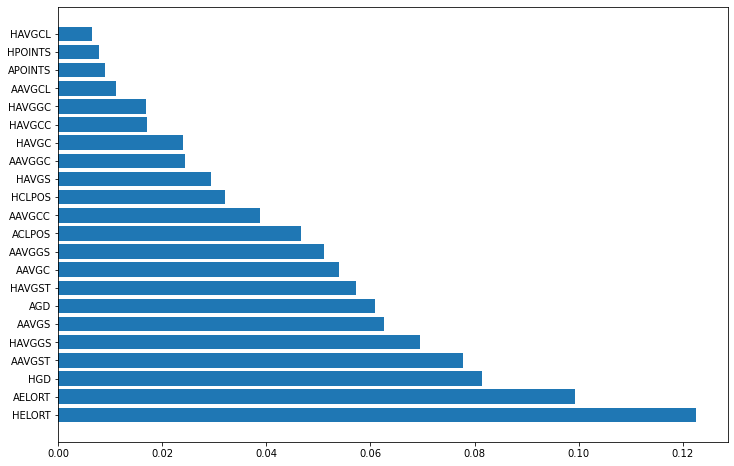

In [179]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
plt.barh(feature_importance['Column'], feature_importance['Feature Importance'])
plt.show()

In [189]:
X = X[['HELORT', 'AELORT', 'HGD', 'AAVGST', 'HAVGGS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [190]:
model = RandomForestClassifier(n_estimators=647, max_depth=8, min_samples_split=203)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=203, n_estimators=647)

In [191]:
model.score(X_train, y_train)

0.5669354838709677

In [194]:
model.score(X_test, y_test)

0.532258064516129

In [195]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-04-08 15:49:22,385] A new study created in memory with name: no-name-0280e9fb-3f83-4f80-b4fc-a594868e53ff
[I 2022-04-08 15:49:44,942] Trial 0 finished with value: 0.4588709677419354 and parameters: {'n_estimators': 438, 'max_depth': 4.448034138881384, 'min_samples_split': 940.5536621548246}. Best is trial 0 with value: 0.4588709677419354.
[I 2022-04-08 15:49:45,772] Trial 1 finished with value: 0.4588709677419354 and parameters: {'n_estimators': 100, 'max_depth': 9.062827755715574, 'min_samples_split': 827.8761787354051}. Best is trial 0 with value: 0.4588709677419354.
[I 2022-04-08 15:49:49,094] Trial 2 finished with value: 0.5395161290322581 and parameters: {'n_estimators': 389, 'max_depth': 4.0032786630663955, 'min_samples_split': 568.736441323454}. Best is trial 2 with value: 0.5395161290322581.
[I 2022-04-08 15:49:51,692] Trial 3 finished with value: 0.5370967741935483 and parameters: {'n_estimators': 314, 'max_depth': 6.591197280588535, 'min_samples_split': 695.1203173664

[I 2022-04-08 15:53:09,122] Trial 33 finished with value: 0.5475806451612903 and parameters: {'n_estimators': 564, 'max_depth': 7.954587144266801, 'min_samples_split': 294.34674205682444}. Best is trial 10 with value: 0.5532258064516128.
[I 2022-04-08 15:53:13,672] Trial 34 finished with value: 0.5548387096774194 and parameters: {'n_estimators': 469, 'max_depth': 5.996136472513875, 'min_samples_split': 222.18797357541536}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:53:15,245] Trial 35 finished with value: 0.5483870967741936 and parameters: {'n_estimators': 156, 'max_depth': 3.411249563820214, 'min_samples_split': 218.27591449421993}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:53:19,251] Trial 36 finished with value: 0.5475806451612903 and parameters: {'n_estimators': 441, 'max_depth': 5.099986306283703, 'min_samples_split': 278.45408615226285}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:53:22,587] Trial 37 finished wi

[I 2022-04-08 15:55:39,992] Trial 66 finished with value: 0.5516129032258064 and parameters: {'n_estimators': 179, 'max_depth': 30.811728161769942, 'min_samples_split': 204.89841145674208}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:55:43,842] Trial 67 finished with value: 0.5524193548387096 and parameters: {'n_estimators': 364, 'max_depth': 22.407173215088388, 'min_samples_split': 209.0915549659783}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:55:45,941] Trial 68 finished with value: 0.5508064516129032 and parameters: {'n_estimators': 206, 'max_depth': 18.856681711801322, 'min_samples_split': 226.06837061717042}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:55:47,132] Trial 69 finished with value: 0.5508064516129032 and parameters: {'n_estimators': 115, 'max_depth': 26.861618733605468, 'min_samples_split': 200.95960636968357}. Best is trial 34 with value: 0.5548387096774194.
[I 2022-04-08 15:55:51,264] Trial 70 finished

[I 2022-04-08 15:57:44,059] Trial 99 finished with value: 0.5508064516129032 and parameters: {'n_estimators': 411, 'max_depth': 4.33785625715407, 'min_samples_split': 243.34323262307007}. Best is trial 34 with value: 0.5548387096774194.


Accuracy: 0.5548387096774194
Best hyperparameters: {'n_estimators': 469, 'max_depth': 5.996136472513875, 'min_samples_split': 222.18797357541536}
